## Run analysis on station summary data for questions 1 & 2

In [1]:
import pandas as pd
import numpy as np
from station import Station
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

%load_ext autoreload
%autoreload

In [14]:
# read in data files
ride_df = pd.read_csv('data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
map_df = pd.read_csv('data/CTA_-_System_Information_-_List_of__L__Stops.csv')
station_map_names = {'Lake':'Lake/State', 'Jackson':'Jackson/State',
                     'Washington':'Washington/Dearborn', 'Morgan':'Morgan-Lake'}
map_df.replace({"STATION_NAME": station_map_names}, inplace=True)

In [2]:
station_summary = pd.read_csv('data/station_summary.csv')

In [ ]:
# to_remove = station_summary[station_summary['Sat_mean'] == 0].index[0]
# station_summary.drop([to_remove], inplace=True)
station_summary['weekday-sat'] = station_summary['Weekday_mean'
                                                ] - station_summary['Sat_mean']
station_summary['weekday-sun'] = station_summary['Weekday_mean'
                                                ] - station_summary['Sun/Hol_mean']

In [3]:
# Find station with highest daily mean
station_summary.loc[station_summary.daily_mean.idxmax()]

Unnamed: 0                    133
Unnamed: 0.1                  133
2017_mean                 16500.1
2017_std                  7487.37
2018_mean                 16338.2
2018_predicted_mean         17052
2018_predicted_std         6151.9
2018_std                   7388.6
2019_predicted_mean       17140.1
2019_predicted_std        6072.62
2020_predicted_mean       17432.9
2020_predicted_std        6064.77
2021_predicted_mean       17724.7
2021_predicted_std        6073.84
2022_predicted_mean       17984.2
2022_predicted_std        6112.43
2023_predicted_mean       18084.4
2023_predicted_std        6055.18
5_yr_num_diff             328.064
5_yr_pct_diff           0.0214307
Sat_mean                   5112.7
Sat_std                   1882.36
Sun/Hol_mean              3906.94
Sun/Hol_std               1620.32
Weekday_mean              17965.6
Weekday_std               2868.45
daily_mean                13901.9
daily_std                  6714.7
latitude                  41.8857
longitude     

In [6]:
high_means = station_summary.sort_values(by='daily_mean', ascending=False).iloc[0:10]

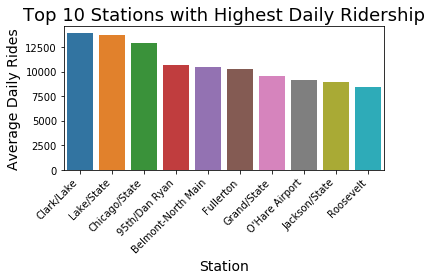

In [10]:
# Plot stations with highest daily means
fig, ax = plt.subplots()
sns.barplot(x='station', y='daily_mean', data=high_means, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 10 Stations with Highest Daily Ridership', fontsize=18)
ax.set_xlabel('Station', fontsize=14)
ax.set_ylabel('Average Daily Rides', fontsize=14)
plt.tight_layout()
plt.savefig('figs/dailyrides_mean.png')

In [11]:
# Find Washington/Wabash's std
station_summary[station_summary['station']=='Washington/Wabash']

,Unnamed: 0,Unnamed: 0.1,2017_mean,2017_std,2018_mean,2018_predicted_mean,2018_predicted_std,2018_std,2019_predicted_mean,2019_predicted_std,...,Weekday_std,daily_mean,daily_std,latitude,longitude,num_na,num_yrs_from_past_5,station,weekday-sat,weekday-sun
144,145,146,6646.986928,4142.266059,8217.79558,9326.215139,2165.349684,2713.632413,10697.046356,2194.505446,...,3035.752612,7498.233533,3525.173041,41.88322,-87.626189,0,1,Washington/Wabash,3886.143697,5519.735043


In [26]:
station_summary.describe()

,Unnamed: 0,Unnamed: 0.1,2017_mean,2017_std,2018_mean,2018_predicted_mean,2018_predicted_std,2018_std,2019_predicted_mean,2019_predicted_std,...,Weekday_std,daily_mean,daily_std,latitude,longitude,num_na,num_yrs_from_past_5,weekday-sat,weekday-sun,high_std
count,145.000000,145.000000,143.000000,143.000000,143.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,72.020690,72.041379,3624.142758,1178.044243,3473.309238,3633.016400,978.541922,1106.656918,3538.765853,952.447398,...,823.643056,3332.544864,1265.439324,21.678619,-45.345411,5.586207,4.889655,1642.486147,2276.656902,0.068966
std,42.037429,42.073328,3148.194010,1155.541314,3050.606840,3211.661345,886.246549,1073.385581,3178.993457,865.761636,...,768.074171,2750.116198,1082.439173,21.016207,43.959691,21.790539,0.688368,1694.520911,2017.221316,0.254274
min,0.000000,0.000000,0.369863,7.066223,0.000000,405.402068,112.512593,15.625022,385.090695,109.920573,...,79.632200,335.545540,157.257942,0.000000,-87.859388,0.000000,0.000000,-159.353182,263.117676,0.000000
25%,36.000000,36.000000,1344.069863,416.207027,1309.140884,1388.879608,361.193097,401.703372,1267.581434,350.120598,...,344.488198,1293.669484,489.734903,0.000000,-87.658530,0.000000,5.000000,563.279163,863.200733,0.000000
50%,72.000000,72.000000,2695.473973,825.054824,2690.287293,2660.233016,732.665210,797.389902,2604.233465,707.697985,...,579.173629,2506.094992,962.885834,41.750419,-87.619021,0.000000,5.000000,1090.686464,1770.543054,0.000000
75%,108.000000,108.000000,4731.341096,1427.390391,4523.024862,4718.493484,1156.882332,1373.778599,4477.204549,1151.194680,...,1026.710465,4415.218310,1647.056492,41.888969,0.000000,0.000000,5.000000,2018.242734,2744.558358,0.000000
max,145.000000,146.000000,18220.276712,7487.371828,17311.762431,18336.763868,6151.896259,7388.604243,17836.384238,6072.616705,...,4412.254604,13901.899061,6714.698839,42.073153,0.000000,90.000000,5.000000,12852.859852,14058.623846,1.000000


### Plot stations with high standard deviations by day of the week & season

In [22]:
high_stds = station_summary.sort_values(by='daily_std', ascending=False).iloc[0:10]
station_summary['high_std']=0
station_summary.loc[high_stds.index,'high_std']=1

high_stations = high_stds.station.tolist()
high_stds.set_index('station', inplace=True)

In [16]:
for stat in high_stations:
    stat = Station(stat, ride_df, map_df)
    stat.make_layered_hist('daytype')

hist_Clark_Lake_daytype.png
hist_Lake_State_daytype.png
hist_Jackson_State_daytype.png
hist_Washington_State_daytype.png
hist_Addison-North Main_daytype.png
hist_95th_Dan Ryan_daytype.png
hist_Washington_Wabash_daytype.png
hist_Washington_Dearborn_daytype.png
hist_Fullerton_daytype.png
hist_Monroe_State_daytype.png


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
for stat in high_stations:
    stat = Station(stat, ride_df, map_df)
    stat.make_layered_hist('season')

hist_Clark_Lake_season.png
hist_Lake_State_season.png
hist_Jackson_State_season.png
hist_Washington_State_season.png
hist_Addison-North Main_season.png
hist_95th_Dan Ryan_season.png
hist_Washington_Wabash_season.png
hist_Washington_Dearborn_season.png
hist_Fullerton_season.png
hist_Monroe_State_season.png


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

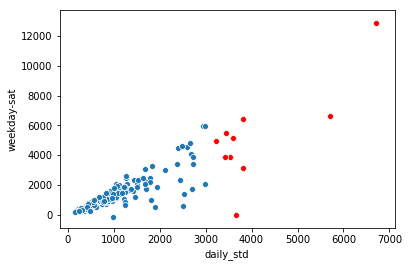

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(x="daily_std", y="weekday-sat", data=station_summary, ax=ax)
sns.scatterplot(x="daily_std", y="weekday-sat", data=high_stds, color='red', ax=ax)

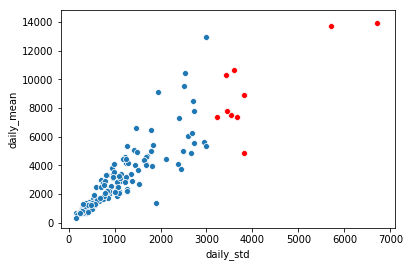

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(x="daily_std", y="daily_mean", data=station_summary, ax=ax)
sns.scatterplot(x="daily_std", y="daily_mean", data=high_stds, color='red', ax=ax)

In [25]:
df=station_summary
x='daily_std'
y='daily_mean'
color = 'high_std'
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))

scatter = ax.scatter(np.array(df[x], dtype=float),
                     np.array(df[y], dtype=float),
                     c=np.array(df[color], dtype=float),
                     alpha=0.9,
                     vmin=0,
                     vmax=6,
                     cmap='Set2')


ax.grid(color='white', linestyle='solid')

ax.set_title(x+' vs '+y, size=20)
ax.set_xlabel('Mean Daily Standard Deviation', fontsize=16)
ax.set_ylabel('Mean Daily Rides', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

labels = df['station'].tolist()
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()


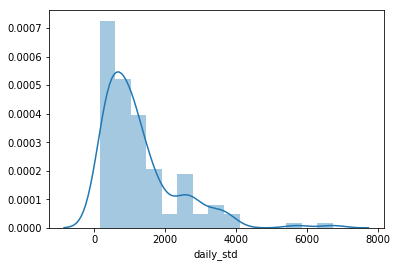

In [19]:
sns.distplot(station_summary['daily_std'])